In [3]:
%%time
print("start")
%run -i 'myimports.py'
# %run -i "youtube_extraction.py"
# %run -i "nlp_processing.py"
%run -i "timestamp_generation"
%run -i "datagathering"

nlp = spacy.load('en_core_web_sm')



#get collection of documents (minute of podcast) in a list
file = "temp/#101|Joscha_Bach|Artificial_Consciousness_and_the_Nature_of_Reality.txt"
document_size = 1000
topic_size = 2000

dictionary, model = generate_model(file, document_size, topic_size)
# doc = nlp(open(file).read())
sents = re.split("(?<=[.?!])\s", open(file).read())
sents = list(map(contractions.fix, sents))

one_topic_confi = load_confidences(file, topic_size, dictionary, model, sents, basic_completion) #get top topic predictions for each sentence
top_confi = np.zeros([int(pod_word_count(file)/topic_size), len(sents)])

#need to optimize number of topics in a document, how many previous sentences and after sentences will current sentence be compared to, alpha and beta values for LDA


#Each sentence topic probability will be compared to previous x number of sentence topics before and after


start
CPU times: user 5.28 s, sys: 3.01 s, total: 8.29 s
Wall time: 10.5 s


In [13]:
breaks = ["So can we try to reverse engineer your mind a little bit?",
         "So what is your sense in the philosophical?",
         "Do you think of computation and computer science and you kind of represent that to me?",
         "Can you talk about what is dualism or does idealism or is materialism?",
          "But why does the simulation feel like something?",
          "But what is the connection between the the brain, the mind and the broader universe which comes first, which is more fundamental?",
          "So have you ever seen artificial intelligence or any kind of construction idea that allows for unlike neural networks or perhaps within neural networks, that is able to form something where the space of concepts continues to be integrated?",
          "What kind of mechanisms might we move towards to improve the learning procedure?",
          "or so that you discovered this?",
          "The dopamine rush of the like, no matter how like I consider I tried to be very kind of Zen like and minimalist and not be influenced by likes and so on.",
          "What kind of mechanisms of government do you think we as a species should be evolving with us?",
          "So what is the trajectory out of self-destruction, do you think?",
          "What is the most beautiful to you, silly ape, the most beautiful, surprising idea in the development of artificial intelligence, whether in your own life or in the history of artificial intelligence that you have come across.",
          "All the competitors in the game are improving gradually.",
          "Do you think that ajai systems that we try to create or greater intelligence systems would need to have a body?",
          "How does that change the fundamentals of the zeroth order in the first order?",
          "If you can directly access all of Wikipedia in trying to understand what is the best form of government, then every thought will not be stuck in a like every thought that requires some extra piece of information will be able to grab it really quickly.",
          "But in the context of the mind, what is the role of emotion and what is it?",
          "So do you think suffering is fundamental to happiness along these lines, suffering as the result of caring about things that you cannot change?Z"        
         ]


timestamp_array = np.zeros([len(sents), 1])
for ind, sent in enumerate(sents):
    if next((True for single in breaks if sent in single), False):
        print(ind)
        timestamp_array[ind] =1

27
102
522
572
698
796
1104
1173
1202
1287
1383
1483
1559
1612
1731
1874
2018


In [4]:
timefile = "lextimestamps2/#101|Joscha_Bach|Artificial_Consciousness_and_the_Nature_of_Reality.txt"
texts = list([para for para in soup.find(class_="hsp-episode-transcript-body").find_all(class_="hsp-paragraph")])

with open(timefile, "r") as r:#scraped timestamps
    chapters = [line.split(" - ")[0] for line in r.readlines()[1:]]
        
breaks = []
i,j=0,0
timestamp_array = np.zeros([len(sents), 1])
while i<len(chapters):
    while j<len(texts):
        j+=1
        if int(texts[j].get("title").split(" ")[2])> convert_time(chapters[i]): #reach time greater than the timestamp, marks a new topic and must save
            breaks.append(contractions.fix(texts[j].text.split(" ",1)[1])) #save paragraph of new topic
            break
    i+=1
    

i, j = 0, 0
while i < len(breaks):
    while j<len(sents)-1:
        j+=1
        if sents[j] in breaks[i]:
            timestamp_array[j] = 1
            print(j)
            break
    i+=1

28
99
205
257
344
519
571
637
698
766
796
880
1102
1147
1198
1285
1381
1418
1481
1556
1607
1725
1874


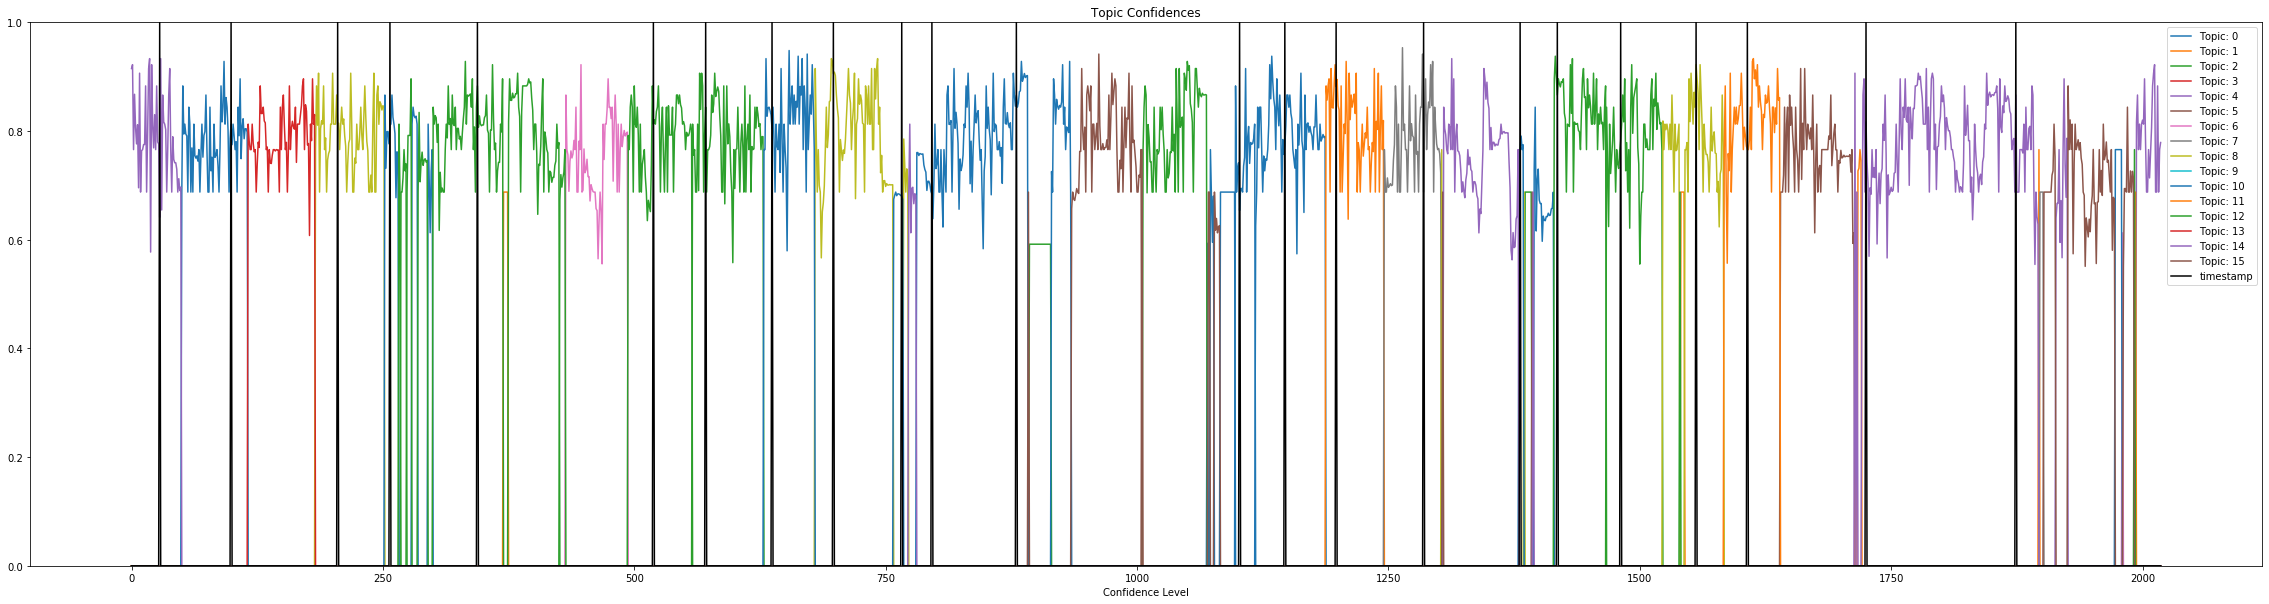

In [6]:
for ind, i in enumerate(one_topic_confi):
    top_confi[int(i[0])][ind] = i[1]

x = np.arange(0, len(sents))
# x.size
plt.title("Topic Confidences")
plt.xlabel("Sentence Number")
plt.xlabel("Confidence Level")
plt.ylim(0,1)
for i in range(int(pod_word_count(file)/topic_size)):
    plt.plot(x,top_confi[i], label="Topic: "+str(i))
plt.plot(x, timestamp_array, label="timestamp", color="black")
plt.legend()
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()

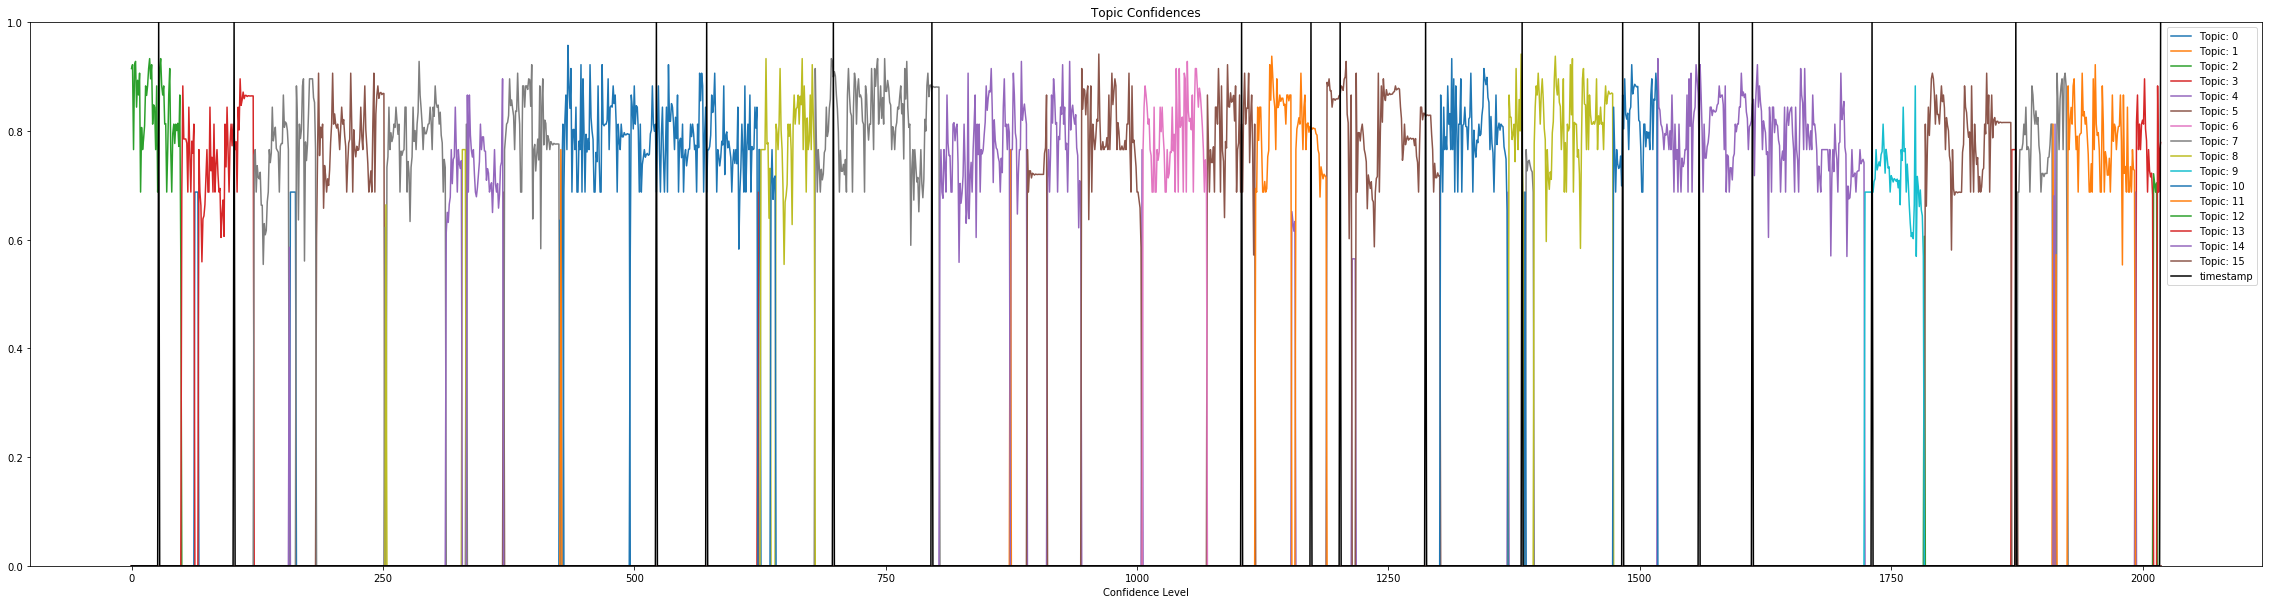

In [14]:
for ind, i in enumerate(one_topic_confi):
    top_confi[int(i[0])][ind] = i[1]

x = np.arange(0, len(sents))
plt.title("Topic Confidences")
plt.xlabel("Sentence Number")
plt.xlabel("Confidence Level")
plt.ylim(0,1)
for i in range(int(pod_word_count(file)/topic_size)):
    plt.plot(x,top_confi[i], label="Topic: "+str(i))
plt.plot(x, timestamp_array, label="timestamp", color="black")
plt.legend()
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()